# Part I - (Prosper Dataset Exploration )
## by (FELIX YEBOAH)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#">Preliminary Wrangling</a></li>
<li><a href="#Univar">Univariate Exploration</a></li>
<li><a href="#Bivar">Bivariate Exploration</a></li>
<li><a href="#eda">Multivariate Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction
> Introduce the dataset

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Few of the variable descriptions are included below;
>> IsBorrowerHomeowner -- A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
CurrentlyInGroup	Specifies whether or not the Borrower was in a group at the time the listing was created.
>> GroupKey -- The Key of the group in which the Borrower is a member of. Value will be null if the borrower does not have a group affiliation.
>> DateCreditPulled -- The date the credit profile was pulled. 
>> CreditScoreRangeLower -- The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
>> See [link](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) for full description
 


## Factors That Affect Loan Applications

## Introduction To Dataset

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

<a id='Wrangling'></a>
## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe, have a look at the first 10
loan = pd.read_csv('prosperLoanData.csv')
loan.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
# explore the shape and data types of the variables
print(loan.shape)
print(loan.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [5]:
# change LoanOriginationDate from String to datetime format
loan['LoanOriginationDate'] = loan['LoanOriginationDate'].astype('datetime64')
# Extracting Year in which Loan Originated
loan['LoanOriginationYear'] = pd.DatetimeIndex(loan['LoanOriginationDate']).year

In [6]:
# Change ListingCategory(numeric) from numeric to category by creating an explanoyory column
ListingCategory = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

loan['ListingCategory'] = loan['ListingCategory (numeric)'].map( ListingCategory)

In [7]:
# overview of the dataset
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 83 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  object        
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   object        
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

### What is the structure of your dataset?
> The dataset consist of 113937 rows and 81 columns, with most variables being numeric. About 80% of the varaibles have non-null values.


### What is/are the main feature(s) of interest in your dataset?

> I will be exploring the factors that affect the APR of loan,
The employment statuts of borrowers and the category a borrower used his/her loan on along with
other interesting factors


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I beleive variables such as APR, Income Range, Loan Status, Prosper Score will help me explore and investigate the questions above


<a id='Univar'></a>
## Univariate Exploration



Before I start my exploratory analysis, I will like to know  the distribution of the borrowers interms of their credit score

In [11]:
status = []
for x in loan.CreditScoreRangeUpper:
    if x < 580:
        status.append('Poor')
    elif x < 670:
        status.append('Fair')
    elif x < 740:
        status.append('Good')
    elif x < 800:
        status.append('Very Good')
    else:
        status.append('Exceptional')

In [12]:
loan['CreditScore'] = status

In [13]:
loan['EmploymentStatus'] = loan['EmploymentStatus'].replace('Not available', np.nan)

In [14]:
loan['ListingCategory'] = loan['ListingCategory'].replace('Not Available', np.nan)

# Distribution of Credit Score

,Good,Fair,Very Good,Poor,Exceptional
CreditScore,53.76,18.52,17.99,4.95,4.78


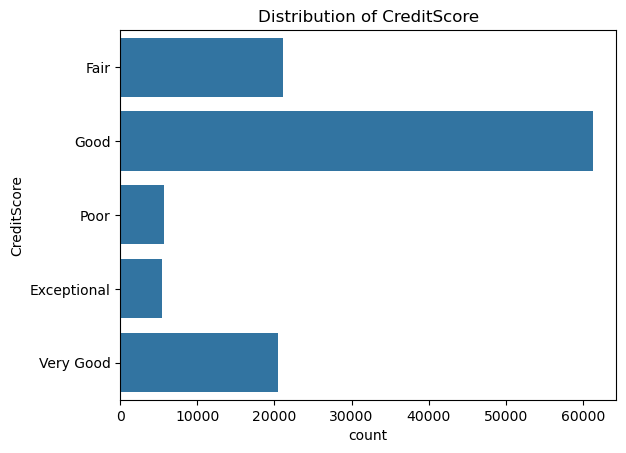

In [15]:
base_color = sb.color_palette()[0]
sb.countplot(y='CreditScore',data = loan, color=base_color)
plt.title('Distribution of CreditScore');
display(loan['CreditScore'].value_counts(normalize=True).mul(100).round(2).to_frame().T)

Your credit history, or the reputation you've built by responsibly handling credit and making payments over time, is a major factor in determining your eligibility for various types of credit.
We take a look at the Credit Score catogories of the borrowers.
From the above graph, majority of borrowers had a Good credit score rating, followed by Very Good credit score rating whereas Poor and Exceptional categories were almost the same.


In [16]:
# We take a look at the debt income ratio of the browers
loan.DebtToIncomeRatio.isnull().sum()

8554

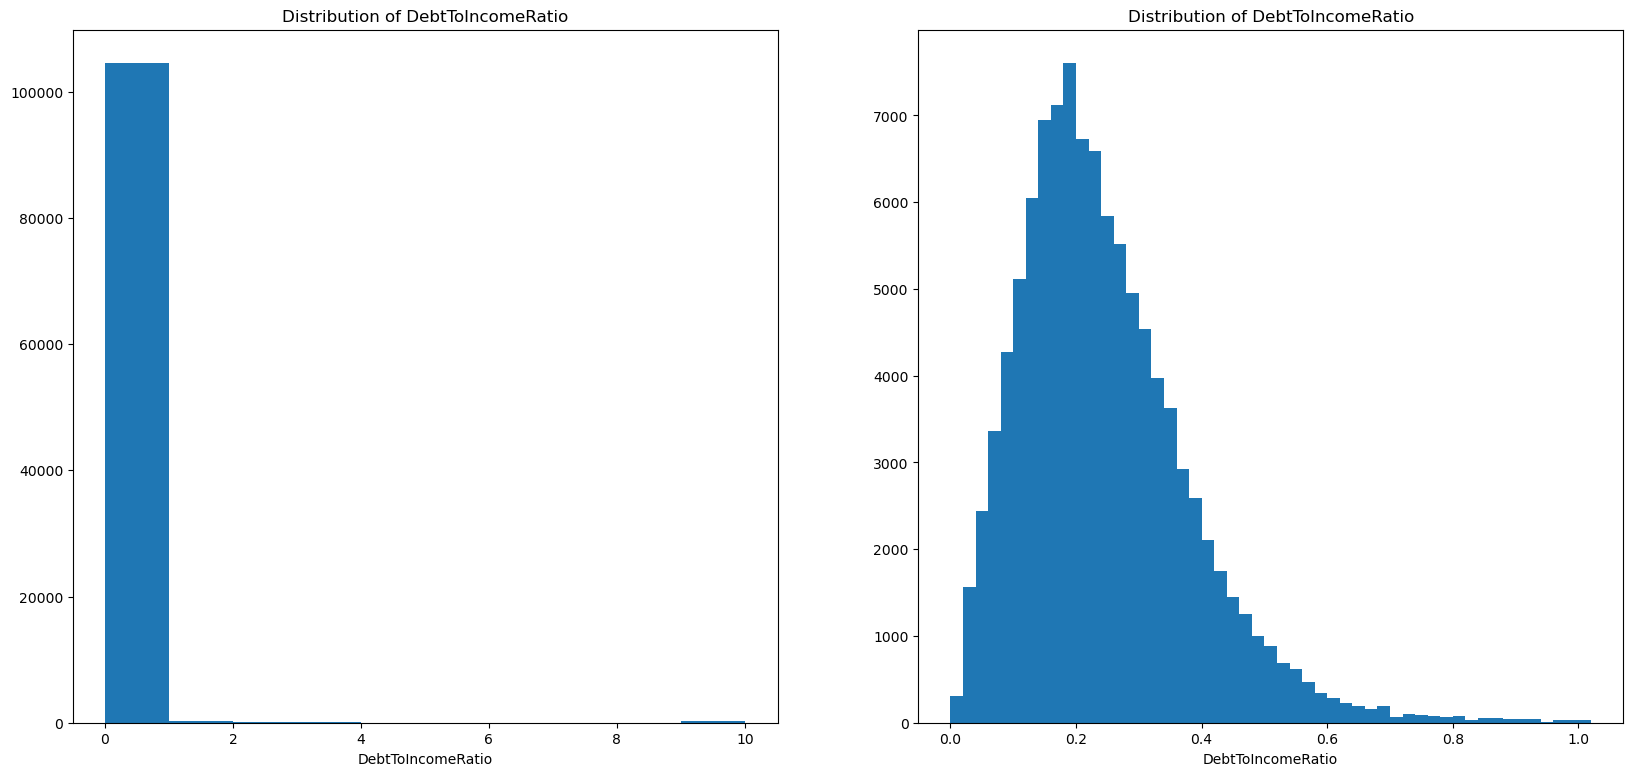

In [17]:
plt.figure(figsize = [20,9]) 

plt.subplot(1, 2, 1) 
plt.hist(x ='DebtToIncomeRatio', data = loan)
plt.title('Distribution of DebtToIncomeRatio')
plt.xlabel('DebtToIncomeRatio')


# axis tranformation since most of the data is between 0.000 and 1
plt.subplot(1, 2, 2) 
bins = np.arange(0.0, 0.99+0.05, 0.02)
plt.hist(x ='DebtToIncomeRatio', data = loan,bins = bins)
plt.title('Distribution of DebtToIncomeRatio')
plt.xlabel('DebtToIncomeRatio');


The distribution of  Debt to Income Ratio on the left is slightly difficult to interpret since almost all the dataset was plotted on single bar. After, exploring the DebtToIncomeRatio variable, I found out that almost 95% of the data is distributed between 0.00 and 1.00, thus I transformed the xlabel to get a clearly picture of the distribution. The distribution on the right show the Debt to Income Ratio is right skewed, with some large outliers.

Next we take a look at  the cost to borrow money as a yearly percentage APR since it also affect loans.

# Distribution of Borrower APR

Text(0.5, 1.0, 'Distribution Of Borrower APR')

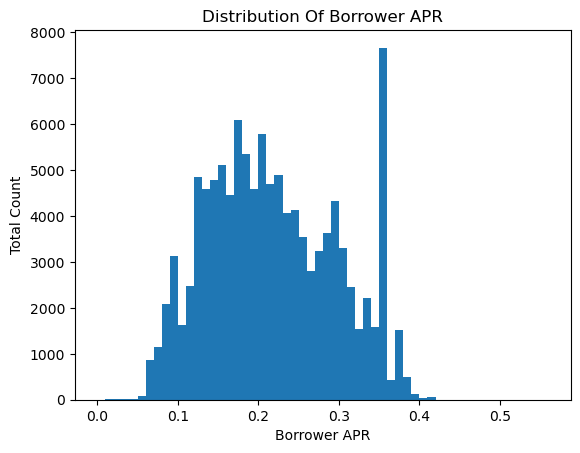

In [18]:
bins = np.arange(0, loan.BorrowerAPR.max() + 0.05, 0.01)
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.ylabel('Total Count')
plt.title('Distribution Of Borrower APR')


The APR distribution appears to be multimodal. Most of the data were between 0.0 and 0.45. It seems some few loans had APR greater than 0.4. Also most loans had APR of about 0.35.

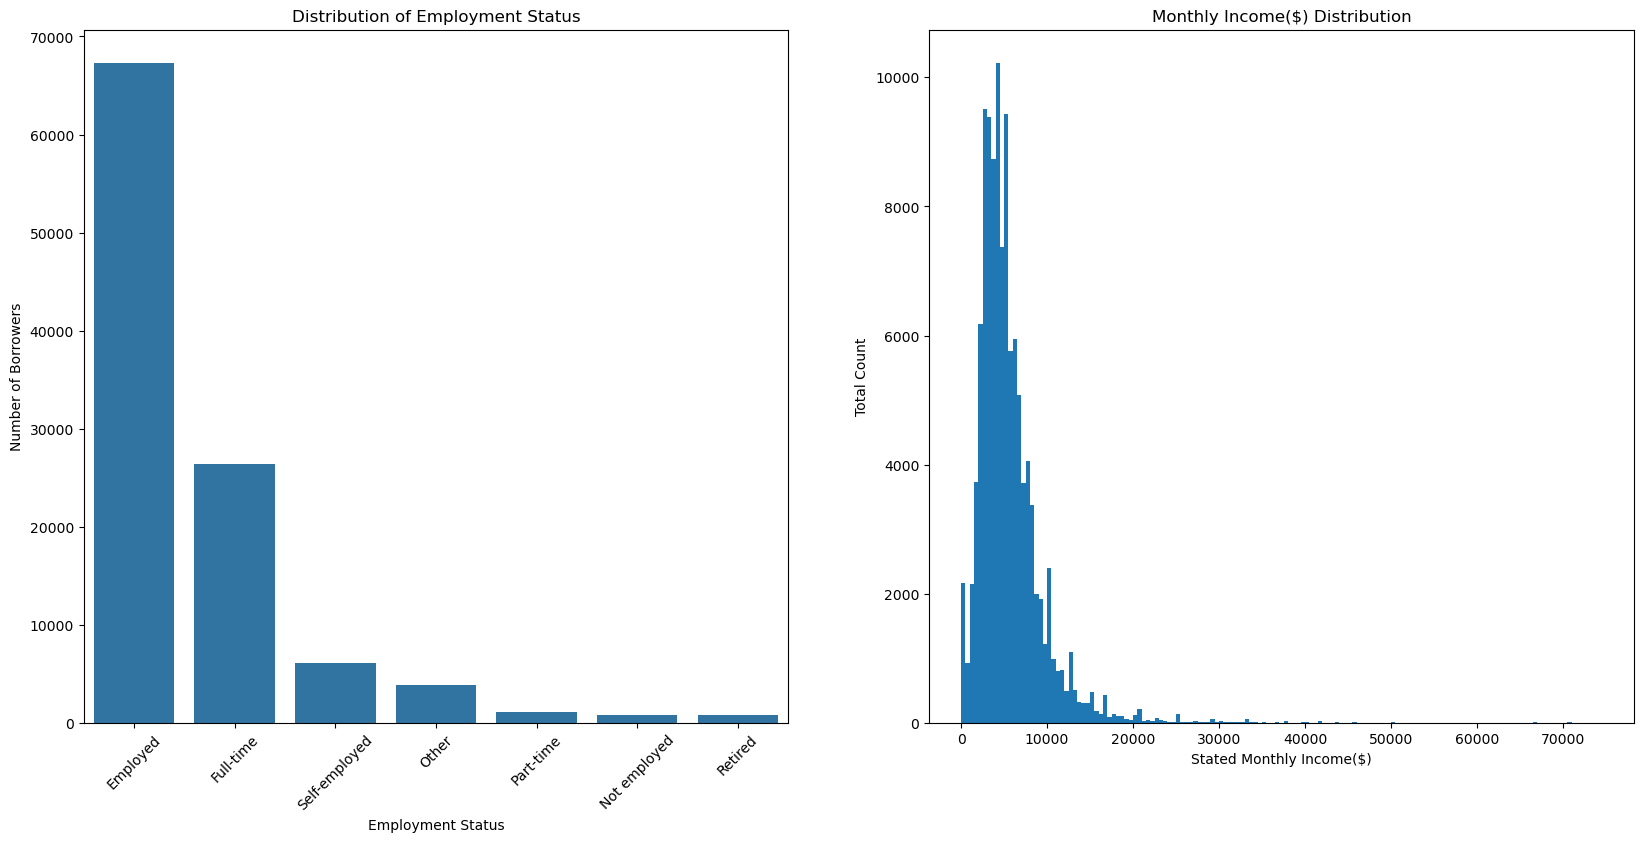

In [19]:
plt.figure(figsize = [20,9]) 

# Plot for Employment Status borrowers
plt.subplot(1, 2, 1) 
# Order the categorical the from highest to lowest 
empl_order = loan['EmploymentStatus'].value_counts().index
sb.countplot(data = loan, x = 'EmploymentStatus', color = base_color, order=empl_order)
plt.xlabel('Employment Status')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=45)
plt.title('Distribution of Employment Status')

# Plot for Income Distribution of borrowers
plt.subplot(1, 2, 2) 
income_bins = np.arange(0, 75000, 500)
plt.hist(data = loan, x='StatedMonthlyIncome', bins = income_bins);
plt.xlabel('Stated Monthly Income($)')
plt.ylabel('Total Count')
plt.title('Monthly Income($) Distribution');

Lenders need to determine whether you can comfortably afford your payments. Your income and employment history are good indicators of your ability to repay outstanding debt. Income amount, stability, and type of income may all be considered.<br>The majority of borrowers are employed which is reasonable also, the distribution of monthly income is right-skewed.

Lastly I will like look at the distribution Loans borrowers applied for

In [20]:
loan.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

# Distribution Loan Original Amount 

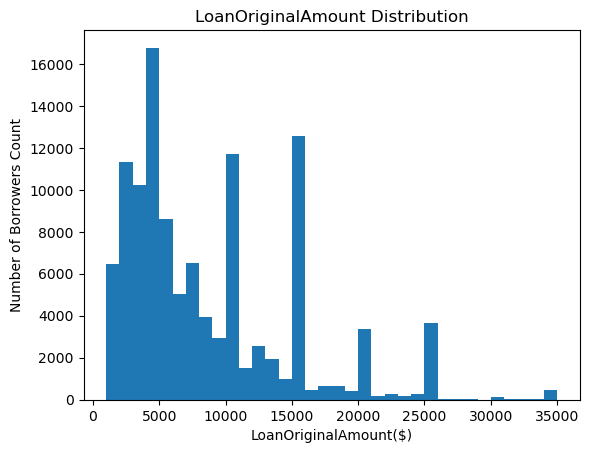

In [21]:
bins = np.arange(1000, 35000+1000, 1000)
plt.hist(data = loan, x='LoanOriginalAmount' ,bins = bins)
plt.xlabel('LoanOriginalAmount($)')
plt.ylabel('Number of Borrowers Count')
plt.title('LoanOriginalAmount Distribution');

As you can see, the bulk of loans are under $15,000 in total.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


> CreditScore Status is the major factor in which I'm interested. When we look at the plot again, we can see that the majority of loan applicants have good credit scores, with only a small number of them having extraordinary scores. According to the distribution above, approximately 53.76% of loan applicants have good credit, followed by 18.52% of applicants with fair credit. The percentage of applicants with exceptional credit score status, however, was nearly equal to the percentage of applicants with terrible credit score.I did a few changes. I categorize and arrange the credit score into distinct groups.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Debt-To-Income Ratio: The distribution of Debt-To-Income Ratio is right-skewed, where most of the data is between 0.00 and 1.00. Although, there are some data that are above 1.00 but still wouldn't change that fact that the distribution will be right-skewed.<br> I transformed the xlabel to get a clearly picture of the distribution.

> Employment Status: Most Loan applicants were classified as "employed," followed by "full-time." Some few loan applocants were  "not employed" or retired. It is likely than those who were accepted are all employed in some capacity. Some of the data was  'not available'.


> Stated Monthly Income: The distribution of stated monthly income is right-skewed . While many of the borrowers earns  around $28,000, there are those with substantially higher incomes.

> LoanOriginalAmount: There are enormous spikes at the 10k, 15k, 20k and 25k. It seems most borrowers applied for than amount of loan.


<a id='Bivar'></a>
## Bivariate Exploration

# Credit score vs Loan Original Amount

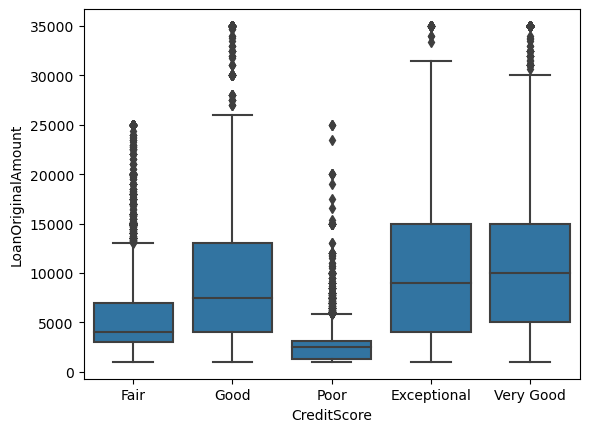

In [22]:
base_color = sb.color_palette()[0]
bins = np.arange(0, 35000, 1500)
sb.boxplot(data = loan, x = 'CreditScore' , y = 'LoanOriginalAmount',  color = base_color)
plt.show()

We can see the amount of loan has a postisve relationship with the borrower credit score status.

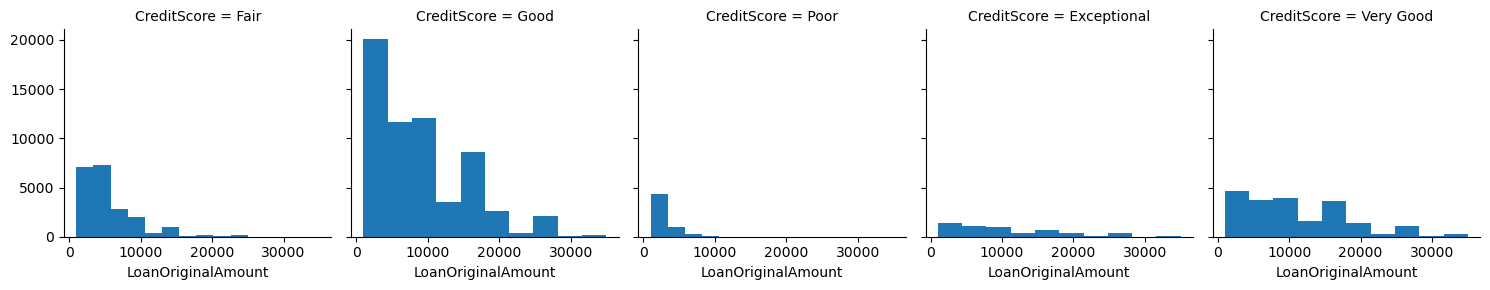

In [23]:
g = sb.FacetGrid(data = loan, col = 'CreditScore')
g.map(plt.hist, "LoanOriginalAmount");

The above graph confirms the relationship between credit score and the loan amount recieved.

Next, we explore the relationship between a borrowers employment Status and loan amount received

# Employment Status vs Loan Original Amount

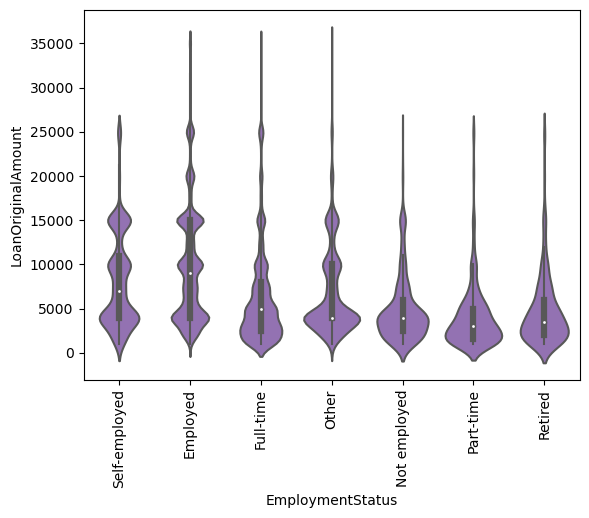

In [24]:
# EmploymentStatus vs LoanOriginalAmount

base_color = sb.color_palette()[4]
bins = np.arange(0, 35000, 1500)
sb.violinplot(data = loan, x = 'EmploymentStatus' , y = 'LoanOriginalAmount',  color = base_color)
plt.xticks(rotation=90)
plt.show()

Having a look at the violin plots above, we can see that borrowers who are employed , received higher amount of loans.

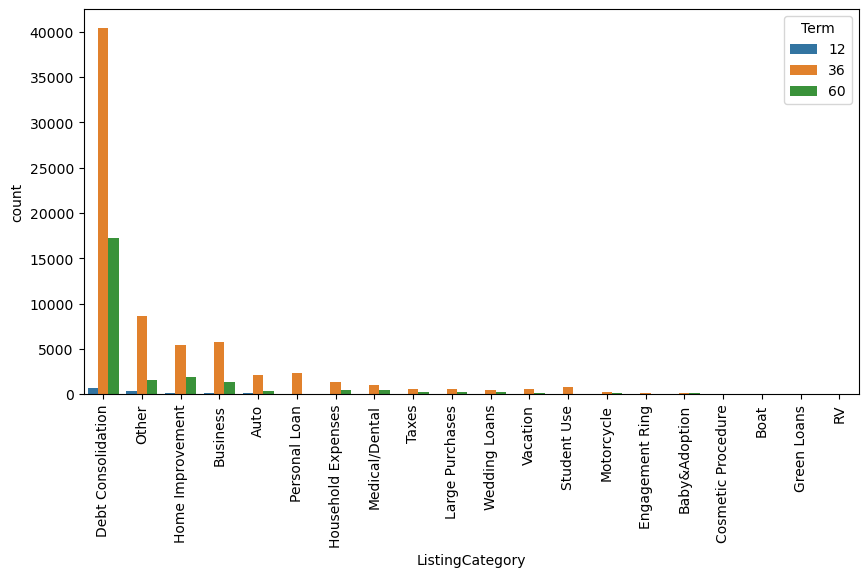

In [25]:
plt.figure(figsize=[10,5])
list_order = loan['ListingCategory'].value_counts().index
sb.countplot(data = loan, x = 'ListingCategory', hue = 'Term', order = list_order)
plt.xticks(rotation=90);

From, the plot above, it shows that most loan amount was paid off in 36 months.

Next, we look at the relationship between loan amount over the years

In [26]:
loan.LoanOriginationYear.min()

2005

 # Loan Amounts over the years

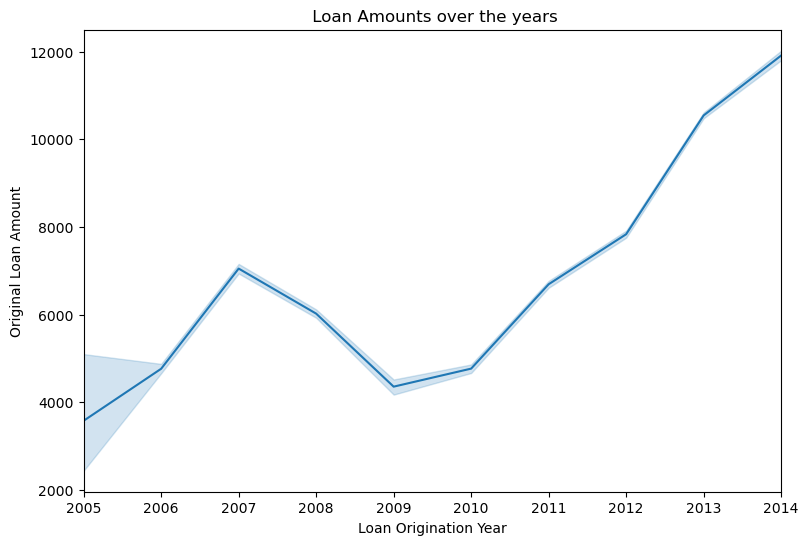

In [27]:
fig = plt.figure(figsize=(9,6))
bin
ax = sb.lineplot(y='LoanOriginalAmount', x='LoanOriginationYear',data=loan)
ax.set_xlim(2005, 2014)
plt.title(' Loan Amounts over the years')
plt.ylabel('Original Loan Amount')
plt.xlabel('Loan Origination Year')
plt.show()

Looking at the line graph above, we can see that the amount of loan started increasing from about 2005 to 2007 and it took a dip from 2007 to about 2009. The amount of money borrowed started increasing again from 2010.


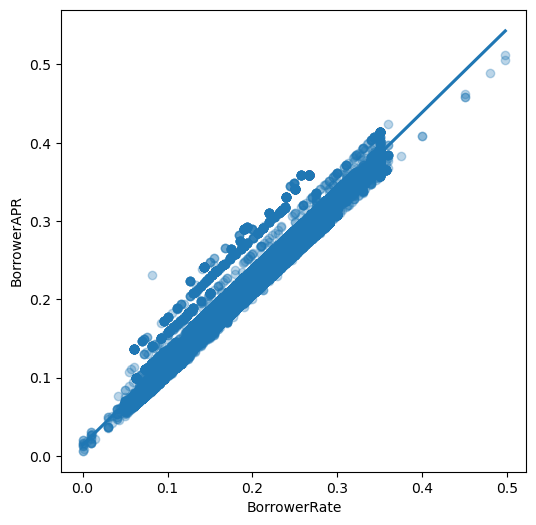

In [28]:
plt.figure(figsize = [6, 6])
sb.regplot(data = loan, x = 'BorrowerRate', y = 'BorrowerAPR',scatter_kws={'alpha':0.3});


As expected, we see the two rates have a postive relationship, since borrower APR includes the interest rate plus discount points and other fees.

Lastly, we take a look at the strength of relationship between BorrowerAPR,LoanOriginalAmount,BorrowerRate ,DebtToIncomeRatio and CurrentCreditLines

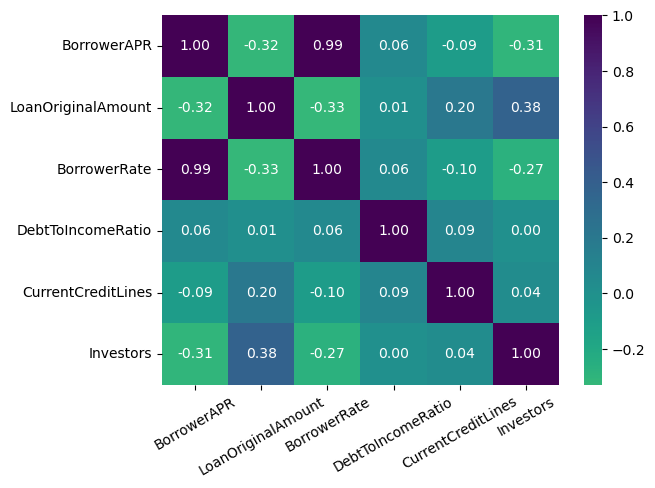

In [29]:
lis_t = ['BorrowerAPR','LoanOriginalAmount','BorrowerRate' ,'DebtToIncomeRatio','CurrentCreditLines','Investors']
sb.heatmap(loan[lis_t].corr(),fmt = '.2f', annot = True,
          cmap = 'viridis_r', center = 0)
plt.xticks(rotation = 30);


We can see that the DebtToIncomeRatio has a mild postive relationship with all the other varaibles, also the number of investors increases as loan amount increases.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The heatmap reveals a high positive link between borrower rate and borrower annual percentage rate, or (0.99). This relationship was expected because, the interest rate imposed on a loan without taking into account the other costs involved with borrowing (borrower rate) is part of the the borrower APR, which is represented as an annual percentage rate, represents the whole cost of borrowing, including all fees and other costs. Given that it takes into account all fees related to the loan, it is a more realistic reflection of the true cost of borrowing. <br>Also, the relationship between loan amount and investors was positive ie (0.38). This makes sense since  each investor has the option to contribute a different amount to the total, the number of investors who participate might affect the loan amount. The loan amount may increase with the number of investors who join.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The relationship between borrower APR and loan amount was negative (-0.32). This confirms the actual connection between the two variables since  smaller loans have higher administrative expenses and a larger chance of default, lenders often charge higher interest rates on them. As the loan amount rises, the lender's risk diminishes and the administrative expenses take up less of the total loan amount, enabling a lower interest rate for the borrower.

## Multivariate Exploration


In [33]:
# Create a susbset of the dataframebb
df = loan.loc[:,('LoanOriginationDate','LoanOriginalAmount','BorrowerAPR','CreditScore')]
df['Month'] = df.loc[:,('LoanOriginationDate')].dt.month 
df['year'] = df.loc[:,('LoanOriginationDate')].dt.year 
df.Month.astype('category')
df.head()

,LoanOriginationDate,LoanOriginalAmount,BorrowerAPR,CreditScore,Month,year
0,2007-09-12,9425,0.16516,Fair,9,2007
1,2014-03-03,10000,0.12016,Good,3,2014
2,2007-01-17,3001,0.28269,Poor,1,2007
3,2012-11-01,10000,0.12528,Exceptional,11,2012
4,2013-09-20,15000,0.24614,Good,9,2013


Now, we take a look at the relationship between Year and BorrowerAPR, during specfic Months

# Year vs BorrowerAPR across months

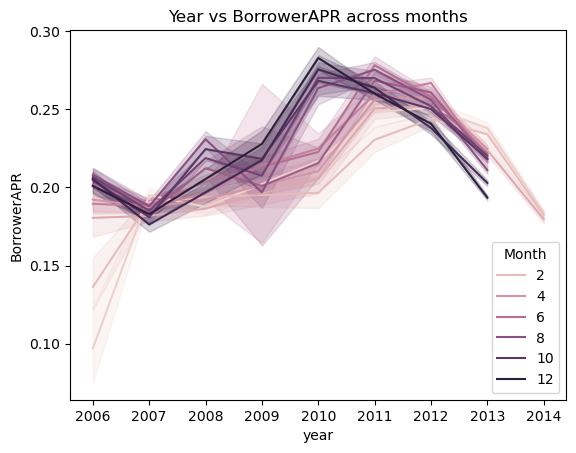

In [34]:
sb.lineplot(data=df, x="year", y="BorrowerAPR",hue = 'Month')
plt.title('Year vs BorrowerAPR across months');

Over the years, it seems Borrower APR tends to increase during the last quater of the year.


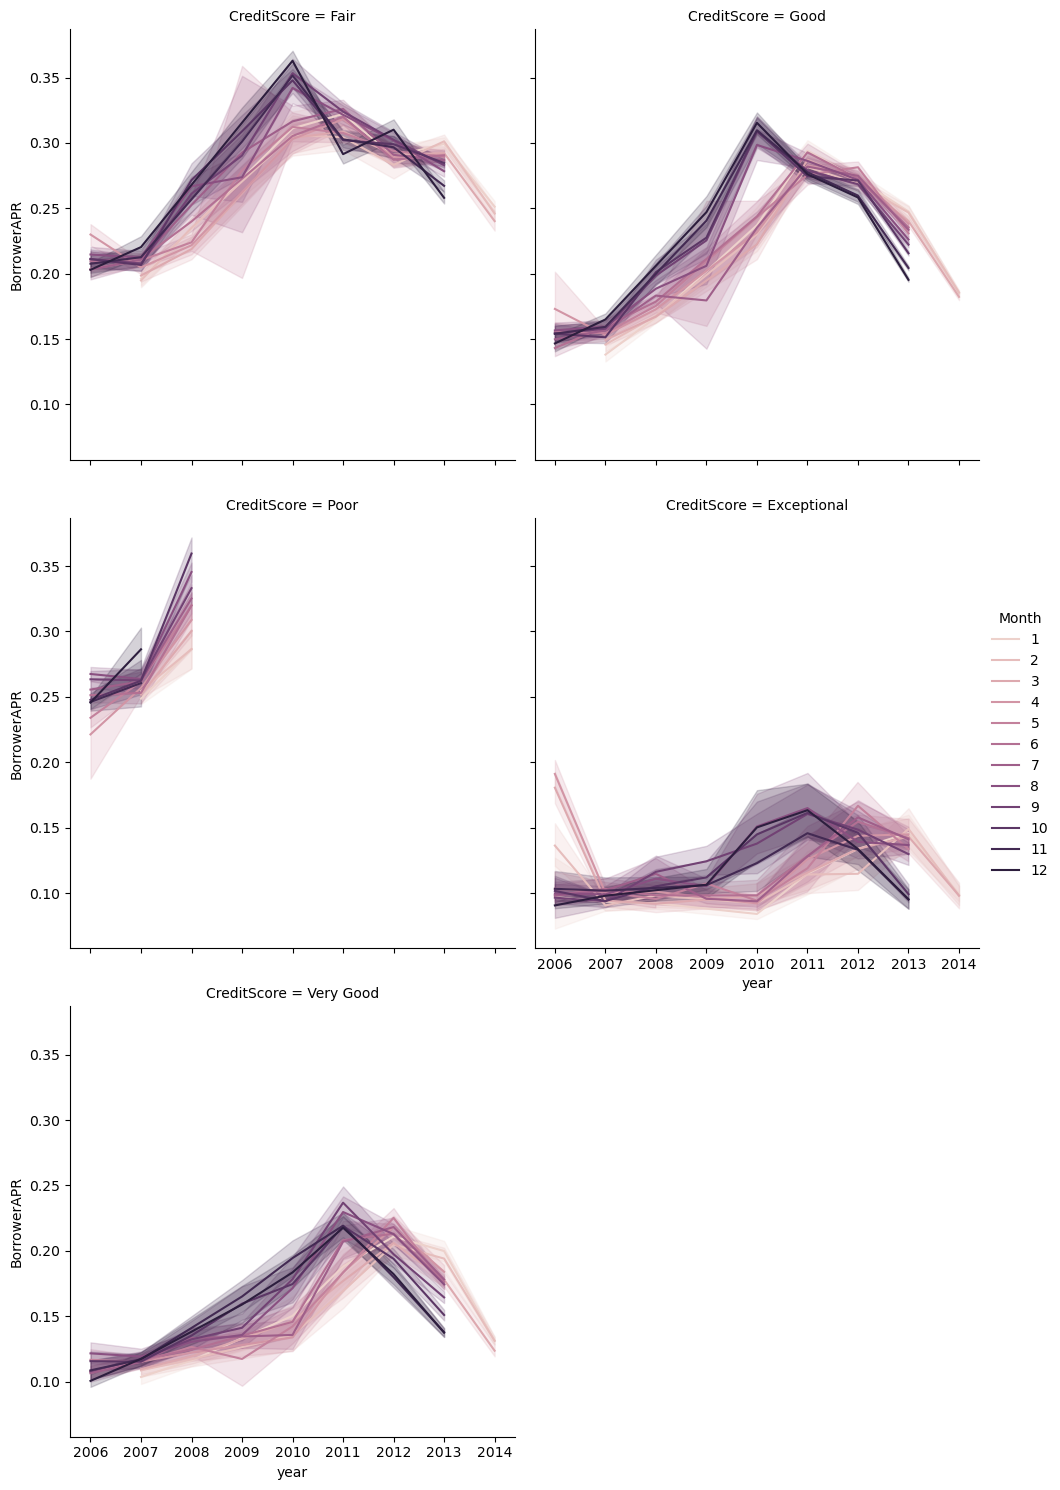

In [568]:
sb.relplot(
    data=df, x="year", y="BorrowerAPR",
    col="CreditScore", hue = 'Month',
    kind="line",legend="full",col_wrap=2
);

Looking at the above plot we can see that as credit score status decrease from exceptional to poor Borrower APR increase from low to high.



In [569]:
df_wide = df.pivot_table(index='year', columns='Month', values='LoanOriginalAmount',aggfunc='mean')
df_wide.columns = ["Jan", "Feb","Mar", "Apr","May", "Jun", "Jul","Aug","Sept", "Oct","Nov", "Dec"]
df_wide = df_wide.T
df_wide.index.name = 'Month'
df_wide 

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,
Jan,NaN,5640.000000,6151.986234,6848.285714,NaN,4995.902813,7192.638344,7370.121171,8645.595951,11786.462234
Feb,NaN,6196.356164,6165.474501,6591.427464,NaN,4812.873950,6471.718584,7448.649966,9325.682195,11964.883835
Mar,NaN,4542.448718,6992.493966,6535.956289,NaN,4569.890909,6269.348611,7545.880457,9981.838177,12187.393524
Apr,NaN,5261.784722,7967.632969,6486.259770,NaN,4344.892361,6553.711111,7473.815789,10277.072118,NaN
May,NaN,4565.229399,7200.585981,5989.317530,2161.538462,3908.817372,6939.842627,7657.031680,10277.697865,NaN
Jun,NaN,4048.342360,7388.586316,5754.868384,NaN,4131.262646,6187.973510,7407.178689,10209.766518,NaN
Jul,NaN,4270.449091,6869.670236,5878.896047,2777.500000,4352.732759,6491.421622,7610.984192,10331.662918,NaN
Aug,NaN,5037.078023,6716.699694,5039.813333,3650.447581,5155.420930,6319.835327,7866.727323,10262.471895,NaN
Sept,NaN,5117.489431,7174.552770,5543.168919,3856.082019,5340.313830,6809.604995,8552.778618,10544.528562,NaN


Now, we take a look at the average amount of loan over the years across months.

# Average Loan Amount Over the Years

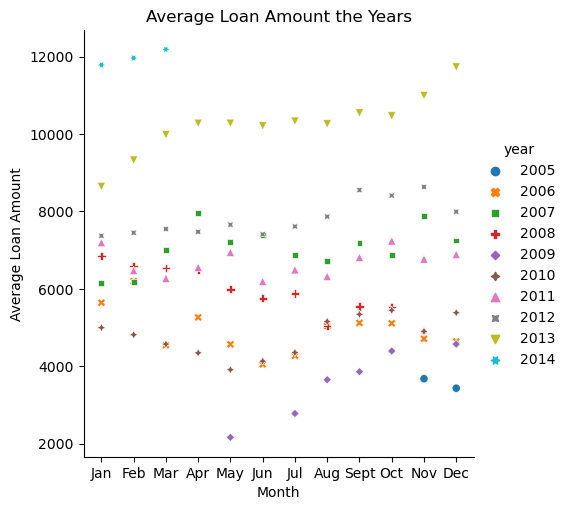

In [570]:
sb.relplot(df_wide)
plt.ylabel('Average Loan Amount')
plt.title('Average Loan Amount the Years');

Looking the graph, the average loan amount has been increasing over the years.

# BorrowerRate across year and creditscore

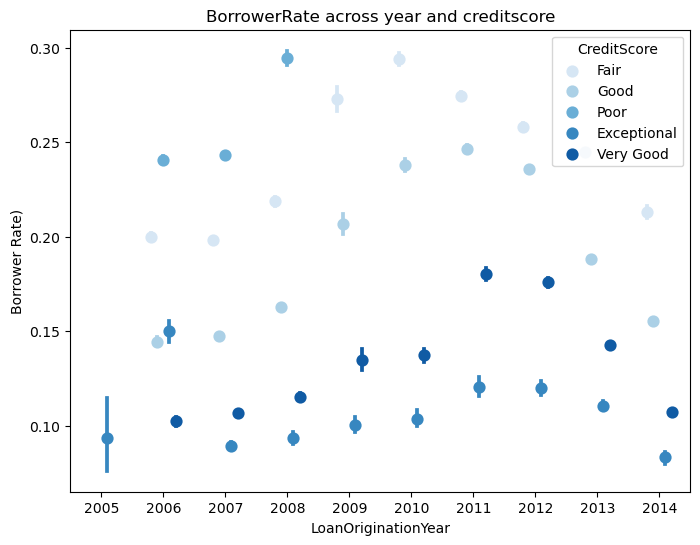

In [571]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan, x = 'LoanOriginationYear', y = 'BorrowerRate', hue = 'CreditScore',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('BorrowerRate across year and creditscore')
plt.ylabel('Borrower Rate)')
ax.set_yticklabels([],minor = True)
plt.show();

Looking at the above plot we can see that as credit score status decrease from exceptional to poor Borrower APR increase from low to high.

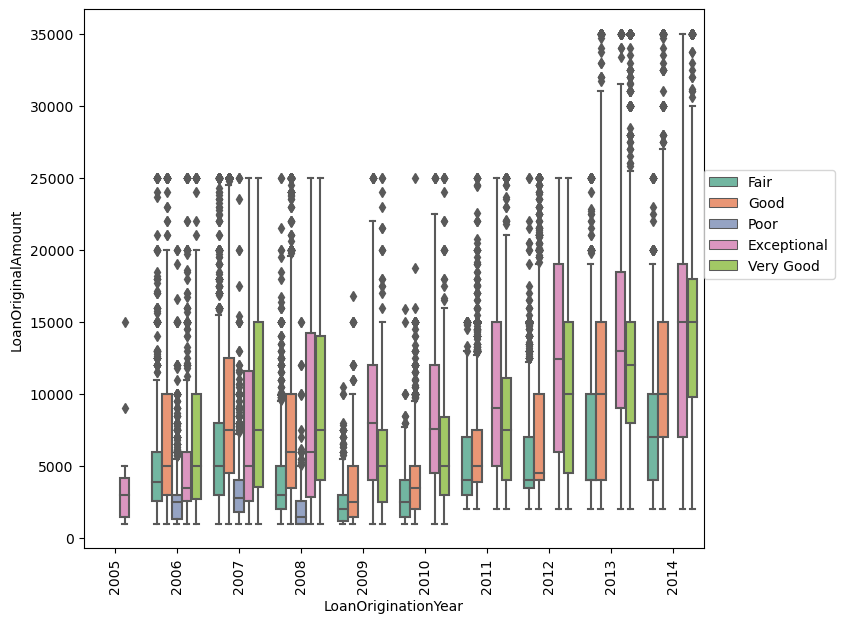

In [572]:
fig, ax=plt.subplots(nrows=1, figsize=(8, 7))
sb.boxplot(data=loan, y='LoanOriginalAmount', x='LoanOriginationYear', ax=ax, hue='CreditScore', palette='Set2')
plt.legend(loc=(1, 0.5))
plt.xticks(rotation=90);

Over the years credit score status has been increase for poor to exceptional whicch have had some effect on the amount of loan borrower can receive.

We take a look at the relationship between the number of investors loan amount and credit score status

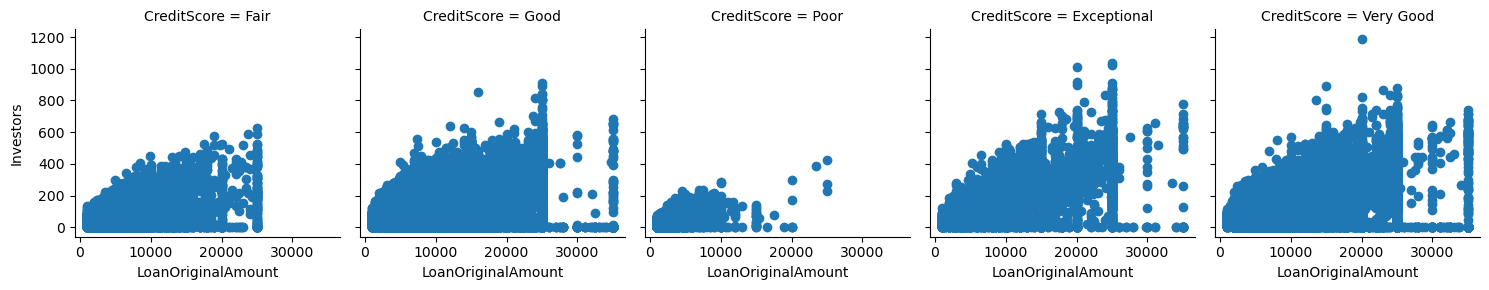

In [577]:
g = sb.FacetGrid(data = loan, col = 'CreditScore',
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount','Investors');

Looking at the graph, except for Poor credit score status, there is not quite difference between the number of investors than fund a loan

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Looking at the findings, I found out that, credit score status play a key role in loan application because, whenever another variable is paired with creditscore status, the effect of credit score status tend to be higher.

### Were there any interesting or surprising interactions between features?

> One surprising finding was that although the average amount of loan borrowed was increasing over the years, so I expected the average amount of loan borrowered in 2009 to be higher than previous years, but I found out that aside for 2005,the year 2009 had the next lowest average amount of loan borrowed.

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt